In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
dfx = pd.read_csv("./Linear Regression/Assignment 2/Train.csv")
print(dfx)

      feature_1  feature_2  feature_3  feature_4  feature_5      target
0      0.293416  -0.945599  -0.421105   0.406816   0.525662  -82.154667
1     -0.836084  -0.189228  -0.776403  -1.053831   0.597997  -48.897960
2      0.236425   0.132836  -0.147723   0.699854  -0.187364   77.270371
3      0.175312   0.143194  -0.581111  -0.122107  -1.292168   -2.988581
4     -1.693011   0.542712  -2.798729  -0.686723   1.244077  -37.596722
...         ...        ...        ...        ...        ...         ...
1595  -0.274961  -0.820634  -0.757173  -0.147555  -0.307149  -80.110012
1596  -0.076099   0.255257   0.290054   1.796036   0.340350  118.315601
1597   1.044177  -0.899206   1.730399  -1.871057   0.442520 -107.510508
1598  -1.269173  -0.005052   1.857669  -1.080365   0.736334  -47.341558
1599  -1.884000  -0.849427  -1.452270   0.488613   1.459576 -115.939003

[1600 rows x 6 columns]


In [35]:
X1 = dfx['feature_1'].values
X2 = dfx['feature_2'].values
X3 = dfx['feature_3'].values
X4 = dfx['feature_4'].values
X5 = dfx['feature_5'].values
Y = dfx['target'].values
x1 = X1.reshape((-1,))
x2 = X2.reshape((-1,))
x3 = X3.reshape((-1,))
x4 = X4.reshape((-1,))
x5 = X5.reshape((-1,))
y = Y.reshape((-1,))
print(y)
print(x1)

[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]
[ 0.29341624 -0.83608408  0.23642511 ...  1.04417694 -1.2691729
 -1.88400025]


In [23]:
def hypothesis(x1,x2,x3,x4,x5,theta):
    return (theta[0] + x1*theta[1] + x2*theta[2] + x3*theta[3] + x4*theta[4] + x5*theta[5])

In [24]:
def error(x1,x2,x3,x4,x5,y,theta):
    e = 0
    for i in range(x1.shape[0]):
        hx = hypothesis(x1[i],x2[i],x3[i],x4[i],x5[i],theta)
        e += (hx-y[i])**2
    return e

In [36]:
def gradient(x1,x2,x3,x4,x5,y,theta):
    grad = np.zeros((6,))
    for i in range(x1.shape[0]):
        hx = hypothesis(x1[i],x2[i],x3[i],x4[i],x5[i],theta)
        grad[0] += hx - y[i]
        grad[1] += (hx - y[i])*x1[1]
        grad[2] += (hx - y[i])*x2[i]
        grad[3] += (hx - y[i])*x3[i]
        grad[4] += (hx - y[i])*x4[i]
        grad[5] += (hx - y[i])*x5[i]
    return grad

In [49]:
def gradientDescent(x1,x2,x3,x4,x5,y,learningRate = 0.0001):
    theta = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
    error_list = []
    maxItr = 500
    itr = 0
    while itr<=maxItr:
        e = error(x1,x2,x3,x4,x5,y,theta)
        grad = gradient(x1,x2,x3,x4,x5,y,theta)
        error_list.append(e)
        theta[0] -= learningRate*grad[0]
        theta[1] -= learningRate*grad[1]
        theta[2] -= learningRate*grad[2]
        theta[3] -= learningRate*grad[3]
        theta[4] -= learningRate*grad[4]
        theta[5] -= learningRate*grad[5]
        itr += 1
    return theta,error_list        

In [50]:
final_theta,error_list = gradientDescent(x1,x2,x3,x4,x5,y)
print(error_list)

[19609808.662452627, 14283812.80088068, 10591663.381964799, 8033364.823126398, 6262223.136839598, 5037688.484092363, 4192754.3345727758, 3611405.3484068667, 3213006.1118223625, 2941486.976496634, 2757847.4870455344, 2634955.726331355, 2553937.650102449, 2501668.3403677475, 2469027.5091107725, 2449685.477224188, 2439257.6637714035, 2434715.2872973266, 2433974.355441214, 2435608.8268297636, 2438650.330733641, 2442448.2763911923, 2446572.1303442917, 2450743.1615283038, 2454786.7937149596, 2458599.3778323447, 2462125.0591160376, 2465339.7130408967, 2468239.8309335425, 2470834.8700562953, 2473142.0264693955, 2475182.699623735, 2476980.1354460083, 2478557.8875513994, 2479938.8436175883, 2481144.639469845, 2482195.3365644123, 2483109.275967027, 2483903.04826884, 2484591.537433756, 2485188.009628583, 2485704.2272679205, 2486150.574947677, 2486536.1884497353, 2486869.0811412632, 2487156.2642685184, 2487403.8591394424, 2487617.200203796, 2487800.9287165427, 2487959.07711058, 2488095.144480795, 2

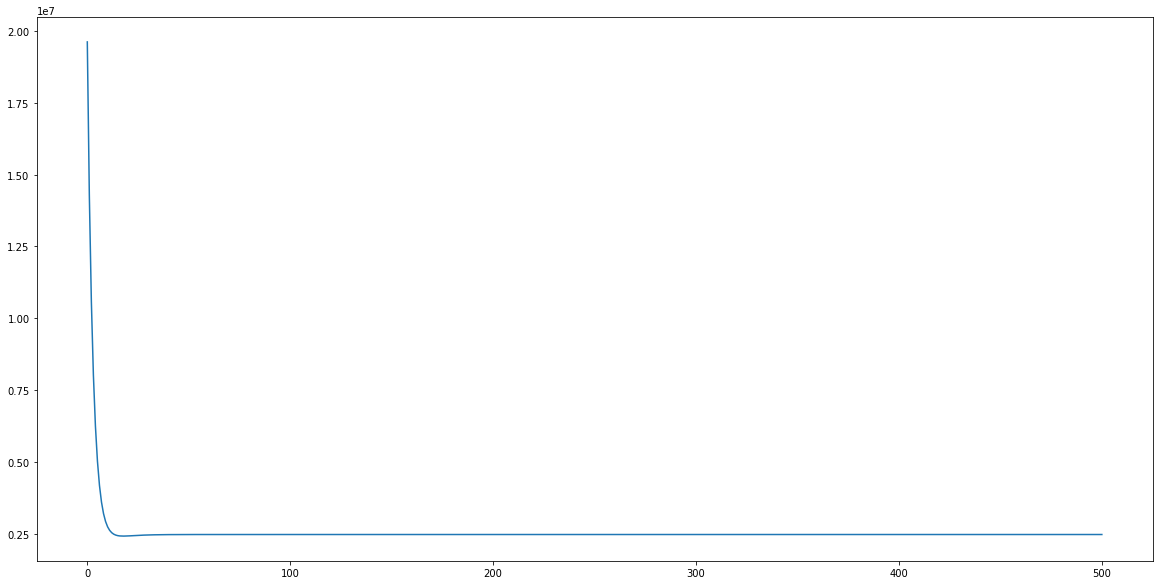

In [51]:
plt.plot(error_list)
plt.show()